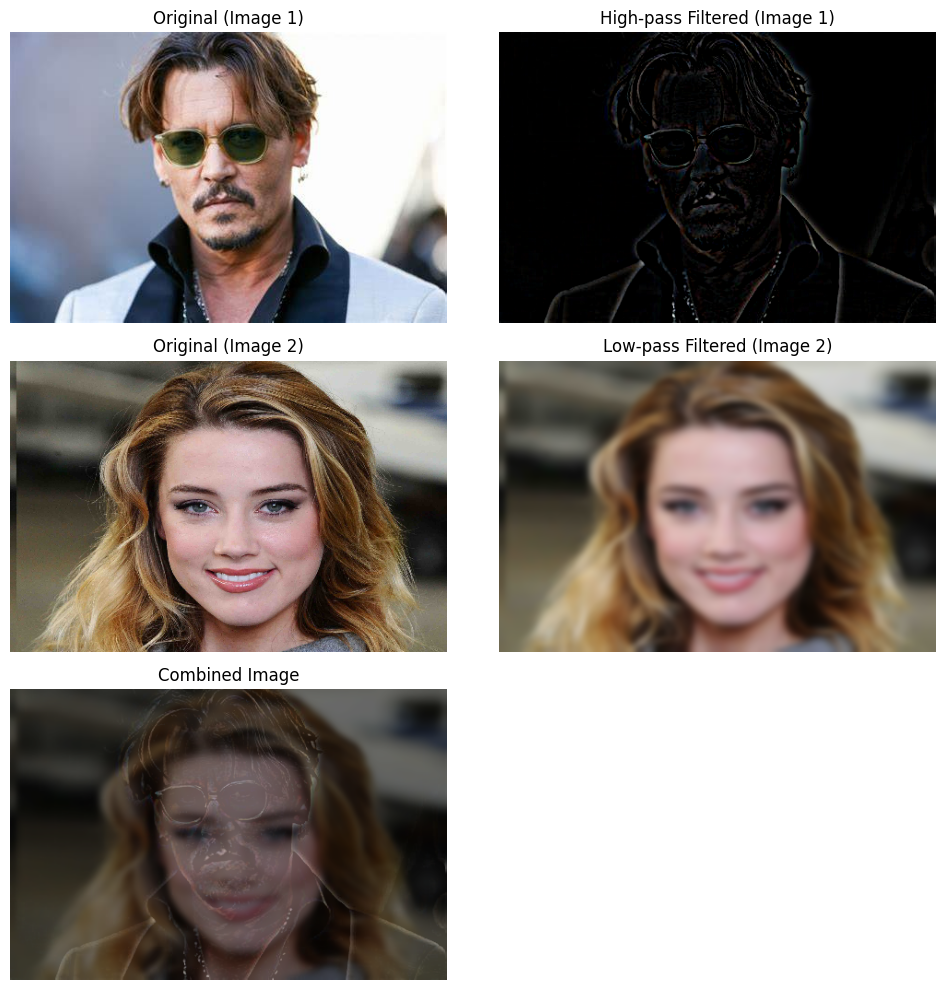

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to apply a high-pass filter
def high_pass_filter(image):
    blurred = cv2.GaussianBlur(image, (21, 21), 0)
    high_pass = cv2.subtract(image, blurred)
    high_pass = cv2.normalize(high_pass, None, 0, 255, cv2.NORM_MINMAX)
    return high_pass

# Function to apply a low-pass filter
def low_pass_filter(image):
    low_pass = cv2.GaussianBlur(image, (21, 21), 0)
    return low_pass

# Function to combine two images
def combine_images(high_pass, low_pass):
    combined = cv2.addWeighted(high_pass, 0.5, low_pass, 0.5, 0)
    return combined

# Load the images
image1 = cv2.imread('prob3_img1.jpg')  # Replace with your image path
image2 = cv2.imread('prob3_img2.jpg')  # Replace with your image path

# Check if images are loaded
if image1 is None or image2 is None:
    print("Error: One or both images not found. Check the file paths.")
else:
    # Resize images to the same size
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Apply filters
    high_pass = high_pass_filter(image1)
    low_pass = low_pass_filter(image2)

    # Combine the images
    combined = combine_images(high_pass, low_pass)

    # Convert images to RGB for displaying
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    high_pass_rgb = cv2.cvtColor(high_pass, cv2.COLOR_BGR2RGB)
    low_pass_rgb = cv2.cvtColor(low_pass, cv2.COLOR_BGR2RGB)
    combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

    # Display the images
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 2, 1)
    plt.imshow(image1_rgb)
    plt.title('Original (Image 1)')
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.imshow(image2_rgb)
    plt.title('Original (Image 2)')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.imshow(high_pass_rgb)
    plt.title('High-pass Filtered (Image 1)')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.imshow(low_pass_rgb)
    plt.title('Low-pass Filtered (Image 2)')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.imshow(combined_rgb)
    plt.title('Combined Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
